### import

In [1]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import talib.abstract as ta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

### raw data 생성 (2018~2019)

In [3]:
# 삼성전자 
samsung_raw = fdr.DataReader('005930', '2018', '2020')
samsung_raw.columns=['open','high','low','close', 'volume', 'change']
# 코스피지수
kospi_raw = fdr.DataReader('KS11', '2018', '2020')
kospi_raw.columns=['open','high','low','close', 'volume', 'change']

In [5]:
# 보조지표 생성

# samsung['2019-01-02':]
samsung = samsung_raw

# 기간별 삼성전자 종가 이동평균 계산
samsung['ma5'] = ta.MA(samsung_raw, timeperiod=5)
samsung['ma10'] = ta.MA(samsung_raw, timeperiod=10)
samsung['ma20'] = ta.MA(samsung_raw, timeperiod=20)
samsung['ma60'] = ta.MA(samsung_raw, timeperiod=60)
samsung['ma120'] = ta.MA(samsung_raw, timeperiod=120)

# 기간별 코스피지수 종가 이동평균 계산
samsung['kospi_ma5'] = ta.MA(kospi_raw, timeperiod=5)
samsung['kospi_ma10'] = ta.MA(kospi_raw, timeperiod=10)
samsung['kospi_ma20'] = ta.MA(kospi_raw, timeperiod=20)
samsung['kospi_ma60'] = ta.MA(kospi_raw, timeperiod=60)
samsung['kospi_ma120'] = ta.MA(kospi_raw, timeperiod=120)

# 볼린저 밴드
samsung['upperband'], samsung['middleband'], samsung['lowerband'] = \
ta.BBANDS(samsung_raw.close)

# 전일 종가 대비 당일 시가 비율 (open/last close)

# 당일 종가 대비 당일 시가 비율 (high/close)

# 당일 종가 대비 당일 저가 비율 (low/close)

# 당일 종가 대비 전일 종가 비율 (close/last close)

# 전일 거래량 대비 당일 거래량 비율 (volume/last volume)

In [8]:
# 2019.01 ~ 2019.12 기간으로 split
samsung = samsung['2019-01-02':]
samsung.describe()

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,kospi_ma5,kospi_ma10,kospi_ma20,kospi_ma60,kospi_ma120,upperband,middleband,lowerband
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.00000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,46563.414634,46989.024390,46122.154472,46583.333333,1.089653e+07,0.001593,46442.317073,46269.044715,45974.014228,45192.818428,44695.569106,2094.44900,2092.980858,2091.221691,2088.160921,2106.053129,47569.464638,46442.317073,45315.169509
std,3799.192036,3788.349684,3773.149909,3776.215397,4.095583e+06,0.014517,3698.351304,3595.503939,3400.952705,2519.799633,1485.351045,76.82408,74.194206,68.873925,53.042514,38.998252,3783.820731,3698.351304,3691.159267
min,37450.000000,37600.000000,36850.000000,37450.000000,4.406531e+06,-0.040678,38130.000000,38340.000000,38905.000000,41337.500000,43120.000000,1915.72400,1922.012000,1930.280000,2003.784333,2040.231250,39019.888875,38130.000000,36713.809595
25%,44012.500000,44362.500000,43650.000000,44000.000000,8.045918e+06,-0.007418,44055.000000,44010.000000,44070.625000,44284.583333,43463.541667,2050.85250,2048.558250,2050.640500,2048.037458,2064.371042,44880.998508,44055.000000,43123.997794
50%,46000.000000,46375.000000,45475.000000,46025.000000,9.871402e+06,0.001120,45800.000000,45785.000000,45506.250000,44890.833333,44544.375000,2090.51800,2090.493500,2094.607000,2085.179000,2122.595875,47014.644087,45800.000000,44638.304929
75%,48762.500000,49237.500000,48487.500000,49012.500000,1.259267e+07,0.010540,48582.500000,48542.500000,47311.875000,45768.125000,45182.916667,2154.47850,2151.500750,2149.961500,2127.841625,2134.218021,49606.340381,48582.500000,47409.954470
max,57000.000000,57300.000000,56000.000000,56700.000000,2.917870e+07,0.040863,56100.000000,55790.000000,53507.500000,51965.000000,48888.750000,2229.61600,2219.730000,2205.629000,2184.248667,2180.276333,57597.966639,56100.000000,55310.063294


In [9]:
# 정규화
scaler = StandardScaler()
samsung_scaled = scaler.fit_transform(samsung)

In [12]:
df = pd.DataFrame(samsung_scaled)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.889354,-2.007338,-2.010944,-2.078616,-0.745945,-0.020805,-2.132941,-2.101073,-1.827181,-1.205055,-0.393909,-0.914895,-0.713392,-0.502172,-0.190759,1.907125,-2.264115,-2.132941,-1.953242
1,-2.179480,-2.232167,-2.303072,-2.383775,0.385337,-2.158444,-2.197967,-2.144270,-1.910416,-1.252112,-0.434948,-1.057146,-0.813144,-0.590884,-0.272413,1.852374,-2.228050,-2.197967,-2.120518
2,-2.403668,-2.483447,-2.462414,-2.423578,0.785964,-0.385346,-2.246737,-2.184680,-1.979655,-1.301820,-0.480765,-1.134753,-0.907319,-0.678846,-0.357203,1.791838,-2.207787,-2.246737,-2.239019
3,-2.258605,-2.139590,-2.210122,-2.078616,0.453232,2.286050,-2.219643,-2.194434,-2.019431,-1.345232,-0.523210,-1.109945,-0.950686,-0.719343,-0.417671,1.735903,-2.153317,-2.219643,-2.240562
4,-2.258605,-2.060239,-2.170286,-2.251097,0.455080,-1.267809,-2.252156,-2.209763,-2.054787,-1.378371,-0.567622,-1.140779,-0.983005,-0.748739,-0.451071,1.684690,-2.208425,-2.252156,-2.249224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2.515279,2.489253,2.384254,2.366085,-0.258676,-0.726271,2.616672,2.338493,1.967714,2.502187,2.607281,1.210378,0.844009,0.430586,0.156877,-1.330674,2.468265,2.616672,2.713313
242,2.383404,2.304100,2.304583,2.233407,0.237797,-0.731823,2.524552,2.436036,2.014855,2.545930,2.656471,1.253395,0.989086,0.479128,0.201848,-1.314602,2.411978,2.524552,2.586414
243,2.146028,2.224748,2.198355,2.339549,-0.306194,0.392011,2.475782,2.533578,2.061997,2.588017,2.712689,1.244473,1.112554,0.527016,0.246523,-1.295207,2.323465,2.475782,2.579420
244,2.409779,2.621506,2.490483,2.631440,0.346573,1.260533,2.502876,2.622759,2.138602,2.638719,2.771718,1.220500,1.189901,0.571259,0.284145,-1.276272,2.422855,2.502876,2.531829


In [13]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2019-01-02 to 2019-12-30
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         246 non-null    int64  
 1   high         246 non-null    int64  
 2   low          246 non-null    int64  
 3   close        246 non-null    int64  
 4   volume       246 non-null    int64  
 5   change       246 non-null    float64
 6   ma5          246 non-null    float64
 7   ma10         246 non-null    float64
 8   ma20         246 non-null    float64
 9   ma60         246 non-null    float64
 10  ma120        246 non-null    float64
 11  kospi_ma5    246 non-null    float64
 12  kospi_ma10   246 non-null    float64
 13  kospi_ma20   246 non-null    float64
 14  kospi_ma60   246 non-null    float64
 15  kospi_ma120  246 non-null    float64
 16  upperband    246 non-null    float64
 17  middleband   246 non-null    float64
 18  lowerband    246 non-null    fl

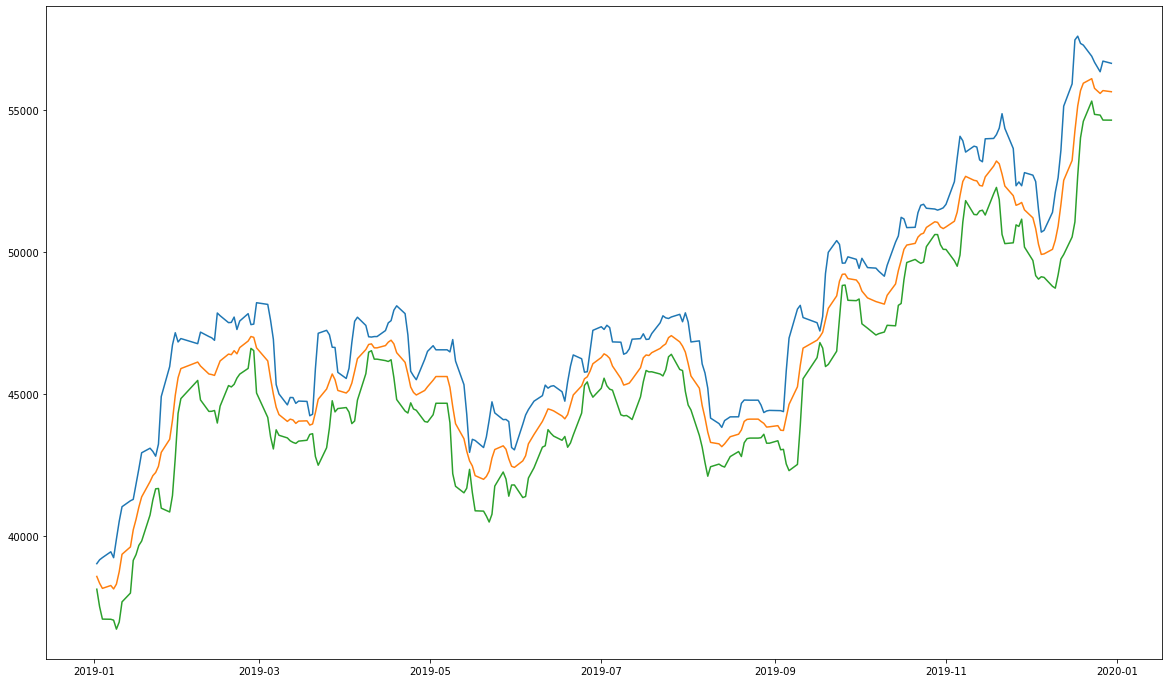

In [7]:
# 시각화

plt.figure(figsize=(20,12))

# plt.plot(
#       samsung.index
#     , samsung.close
#     , label = 'samsung'
# )

# plt.plot(
#       samsung.index
#     , samsung.ma60
#     , label = 'samsung'
# )

# plt.plot(
#       samsung.index
#     , samsung.ma120
#     , label = 'samsung'
# )

plt.plot(
      samsung.index
    , samsung.upperband
    , label = 'samsung'
)

plt.plot(
      samsung.index
    , samsung.middleband
    , label = 'samsung'
)

plt.plot(
      samsung.index
    , samsung.lowerband
    , label = 'samsung'
)